# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a
machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


### 1 .Problem Defination
 
 In a Statemnet
 > With the given data we check that the patient have heart disease or not.
 

### 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https//ww.kaggle.com/ronit£/heart-disease-uci



### 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

### 4. Features

This is were you will get to know about different features of the data

**Create data dictionary**

* ageage in years
* sex(1 = male; 0 = female)
* cp-chest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecgresting electrocardiographic results
* thalach- maximum heart rate achieved
* exang-exercise induced angina (1 = yes; 0 = no)
* oldpeaksT depression induced by exercise relative to rest
* slopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target 1 or 0

# Preparing the tools

Importing Matplotlib,Pandas and Numpy librabries for data Analaysis and Manipulation of the data.




In [1]:
# Importing the libabries which are important.

#Importing EDA(Exploratory Data Analysis) and ploting libabries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To plot the matplolib graphs in jupyter notebook
%matplotlib inline

# Models from scikit learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score, f1_score, plot_roc_curve

# Load Data

In [2]:
data= pd.read_csv('heart-disease.csv')
data.shape # (rows,columns)

(303, 14)

# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

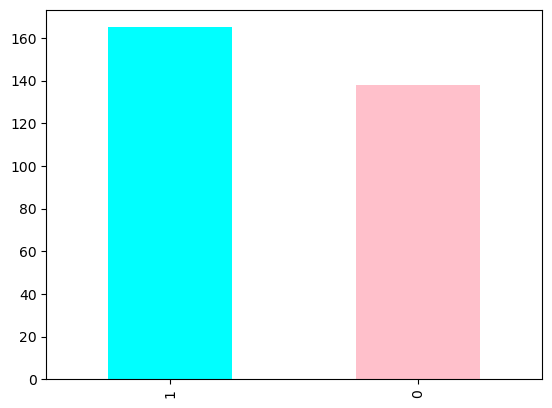

In [6]:
# Now lets plot 
data['target'].value_counts().plot.bar(color=['cyan','pink']);

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Comparing frquency over sex

In [10]:
pd.crosstab(data['target'],data['sex'])

sex,0,1
target,,
0,24,114
1,72,93


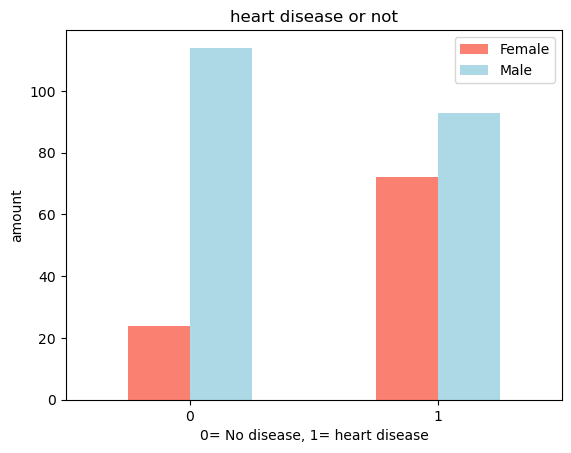

In [11]:
pd.crosstab(data['target'],data['sex']).plot(kind='bar',color=['salmon','lightblue'])

plt.xlabel('0= No disease, 1= heart disease')
plt.title('heart disease or not')
plt.ylabel('amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

# Comparing age vs thalach over frequency

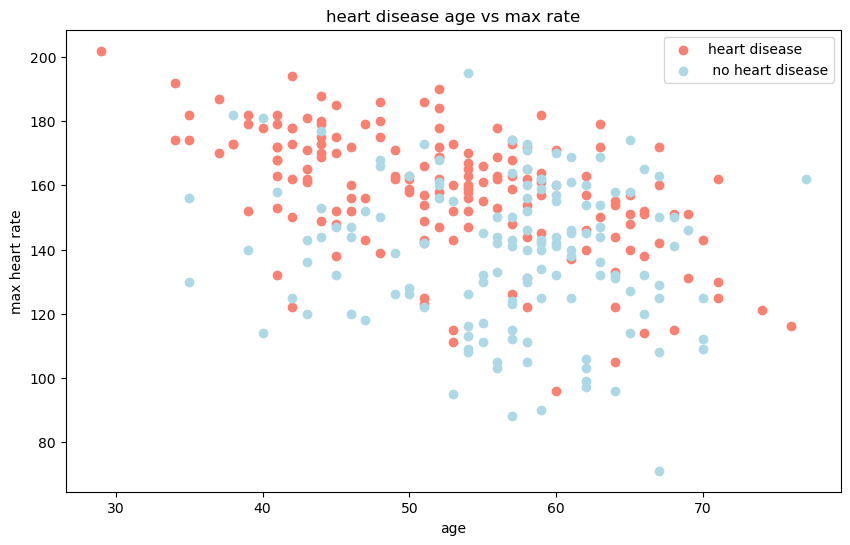

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            color='salmon')

plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            color='lightblue');
plt.title('heart disease age vs max rate')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['heart disease',' no heart disease'])
plt.xticks(rotation=0);


# Comparing chest pain with frequency
cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease


In [13]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


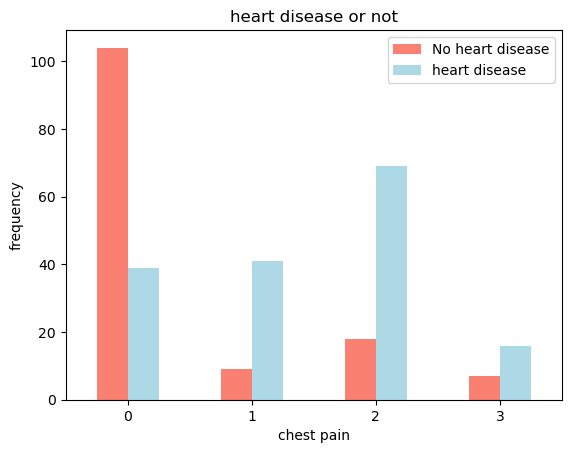

In [14]:
pd.crosstab(data.cp,data.target).plot(kind='bar',color=['salmon','lightblue']);

# more information
plt.title('heart disease or not')
plt.xlabel('chest pain')
plt.ylabel('frequency')
plt.legend(['No heart disease','heart disease'])
plt.xticks(rotation=0);

In [15]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


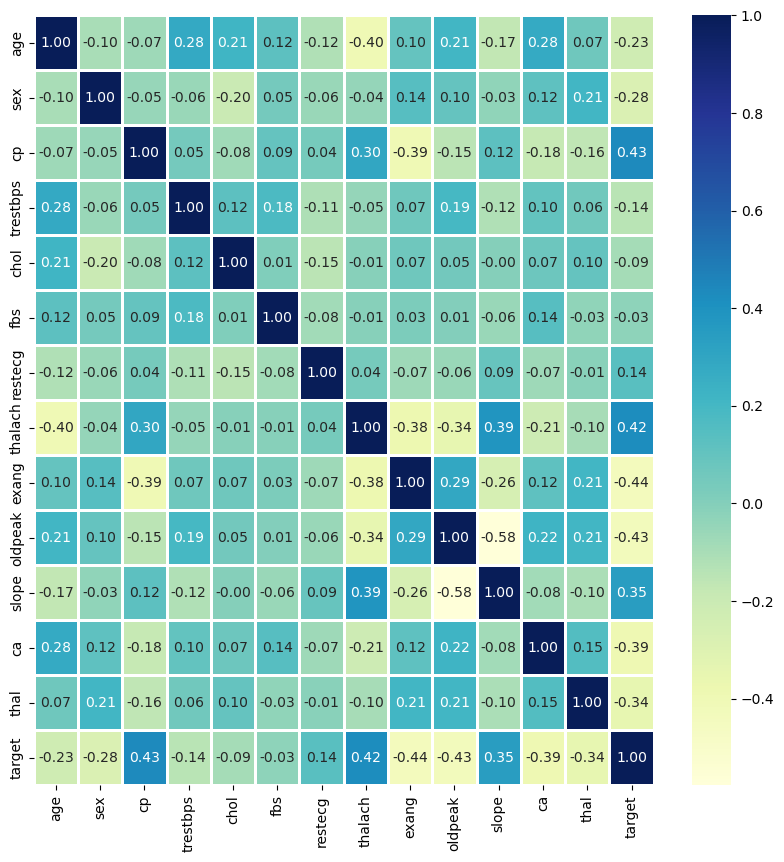

In [16]:
corr_data=data.corr()

fig,ax= plt.subplots(figsize=(10,10))
ax= sns.heatmap(corr_data,
                cmap='YlGnBu',
                 fmt='.2f',
                annot=True,
                linewidths=1
               )

### 5 .Modelling 

In [17]:
X= data.drop('target',axis=1)
Y=data['target']

In [18]:
#Now spliting the train and test data

X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               Y,
                                               test_size=0.2)

In [19]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1


In [20]:
Y_train

77     1
192    0
178    0
22     1
120    1
      ..
262    0
290    0
232    0
242    0
301    0
Name: target, Length: 242, dtype: int64

Now we've got our data split into training and test sets, it's time
to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier



In [21]:
# Lets create a function through which we can evaluate each models score
np.random.seed(42)
model={'Logistic regression': LogisticRegression(),
       'KNN':KNeighborsClassifier(),
       'Random Forest Classifier':RandomForestClassifier()}

def model_sc(model,X_train,Y_train,X_test,Y_test):
    model_score={} # they will get filled over here after evaluation
    for name,model in model.items():
        
        model.fit(X_train,Y_train)
        
        model_score[name]=model.score(X_test,Y_test)
        
    return model_score
    

In [22]:
model_score=model_sc(model=model,
                     X_train=X_train,
                     Y_train=Y_train, 
                     X_test=X_test,
                     Y_test=Y_test)

model_score


C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest Classifier': 0.819672131147541}

# Model Comparison

In [23]:
m=pd.DataFrame(model_score,index=['accuracy'])
m

,Logistic regression,KNN,Random Forest Classifier
accuracy,0.868852,0.655738,0.819672


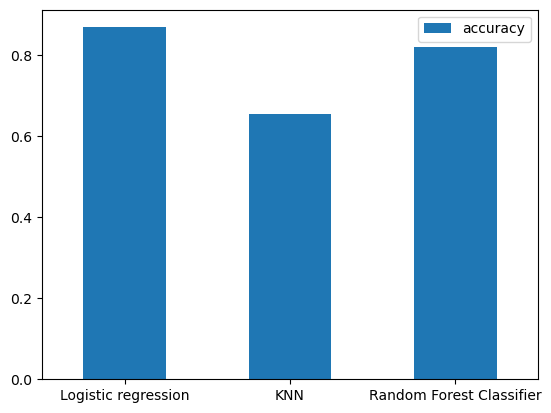

In [24]:
model_compare=m.T.plot(kind='bar')
plt.xticks(rotation=0);

Now we've got a baseline model... and we know a model's first predictions aren't always what we
should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)


# Hyperparmater tuning

In [25]:
train_score=[]
test_score=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()
# Looping with different values of estimators
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    
    #fitting the model
    knn.fit(X_train,Y_train)
    
    
    train_score.append(knn.score(X_train,Y_train))
    
    test_score.append(knn.score(X_test,Y_test))
    
    
    

In [26]:
train_score,len(train_score)

([1.0,
  0.78099173553719,
  0.7768595041322314,
  0.7727272727272727,
  0.7892561983471075,
  0.7644628099173554,
  0.7644628099173554,
  0.7603305785123967,
  0.7355371900826446,
  0.7396694214876033,
  0.71900826446281,
  0.7024793388429752,
  0.7148760330578512,
  0.7107438016528925,
  0.71900826446281,
  0.7024793388429752,
  0.7148760330578512,
  0.71900826446281,
  0.7231404958677686,
  0.7231404958677686],
 20)

In [27]:
test_score,len(test_score)

([0.6885245901639344,
  0.5573770491803278,
  0.6065573770491803,
  0.5737704918032787,
  0.6557377049180327,
  0.6229508196721312,
  0.639344262295082,
  0.6065573770491803,
  0.639344262295082,
  0.5901639344262295,
  0.639344262295082,
  0.6229508196721312,
  0.6557377049180327,
  0.639344262295082,
  0.6557377049180327,
  0.639344262295082,
  0.6229508196721312,
  0.6065573770491803,
  0.639344262295082,
  0.639344262295082],
 20)

In [28]:
df=pd.DataFrame(test_score,index=(range(1,21)),columns=['model_test_score'])
df

,model_test_score
1,0.688525
2,0.557377
3,0.606557
4,0.573770
5,0.655738
6,0.622951
7,0.639344
8,0.606557
9,0.639344
10,0.590164


Max accuracy of KNN model is at68.85%


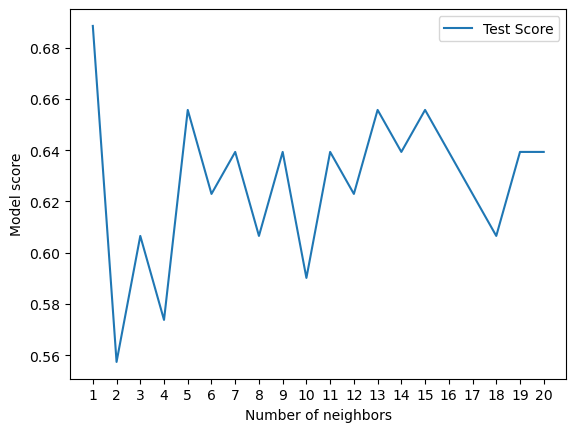

In [29]:
# ploting the graph

plt.plot(neighbors,test_score,label='Test Score')

plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend();
plt.xticks(range(1,21,1));

print(f'Max accuracy of KNN model is at{max(test_score)*100:.2f}%')

# Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()
. using RandomizedSearchCV

 


In [30]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                 "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {'n_estimators': np.arange(10, 1000, 50),
            'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2)}


In [31]:
# Tuning the logitic regression hyper-parameters 

np.random.seed(42)

log_reg=RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_reg_grid,
                           cv=5,
                           n_iter=20,
                           verbose=2)
# Fitting the model
log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [32]:
log_reg.score(X_test,Y_test)

0.8688524590163934

AS we have tried to tune our model with different hyper paramters on the logistic regression kmodel now we will try to tune our RandomForestClassifeir

In [33]:
# Now tuning our RandomForestClassifier
np.random.seed(42)

rs_clf=RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=2)

# Now Fitting our model
rs_clf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.7s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [34]:
rs_clf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [35]:
# Evaluate the randomized search model
rs_clf.score(X_test,Y_test)

0.8032786885245902

# Tuning hyper parmeters using GridSearchCV

In [36]:
gr_log=GridSearchCV(LogisticRegression(),
                    param_grid=log_reg_grid,
                    cv=5,
                   verbose=True)

#Fit the model
gr_log.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
gr_log.score(X_test,Y_test)

0.8688524590163934

In [38]:
model_score

{'Logistic regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random Forest Classifier': 0.819672131147541}

# Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.


In [39]:
Y_preds=gr_log.predict(X_test)
Y_preds

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [40]:
Y_test

292    0
284    0
228    0
0      1
46     1
      ..
140    1
65     1
18     1
111    1
106    1
Name: target, Length: 61, dtype: int64

C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


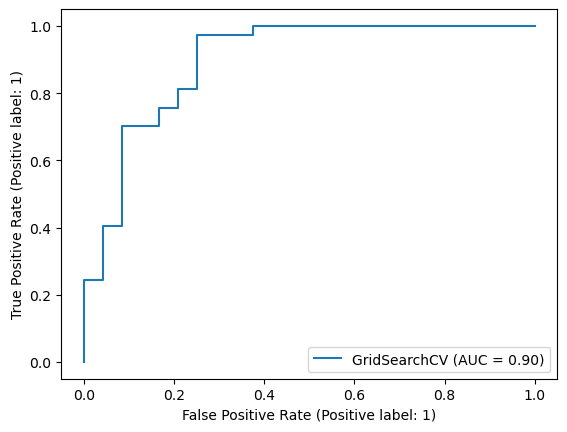

In [41]:
plot_roc_curve(gr_log,X_test,Y_test);

# Confusion Matrix


In [42]:
print(confusion_matrix(Y_test,Y_preds))

[[18  6]
 [ 2 35]]


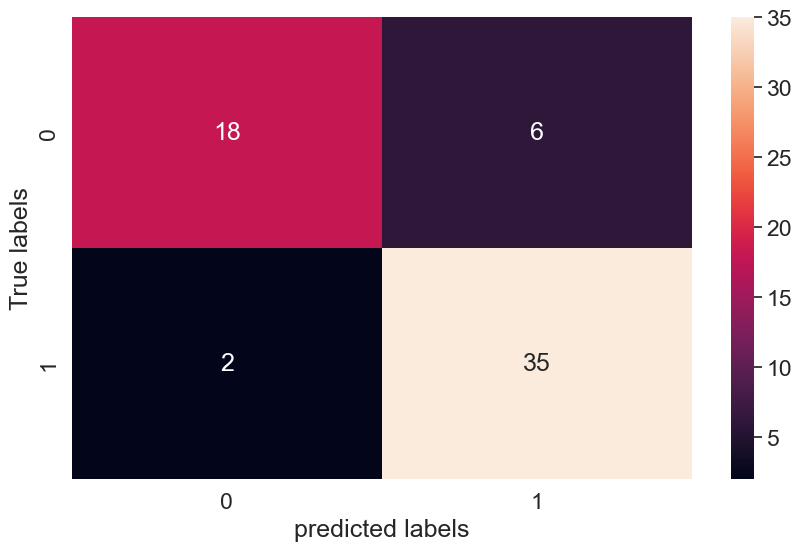

In [43]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test,Y_preds):
    
    fig,ax=plt.subplots(figsize=(10,6))
    ax=sns.heatmap(confusion_matrix(Y_test,Y_preds),
                   annot=True)
    plt.xlabel('predicted labels')
    plt.ylabel('True labels')
  


plot_conf_mat(Y_test,Y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report
as well as cross-validated precision, recall and f1-score.


In [44]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.85      0.95      0.90        37

    accuracy                           0.87        61
   macro avg       0.88      0.85      0.86        61
weighted avg       0.87      0.87      0.87        61



In [52]:
clf=LogisticRegression()

In [56]:
# cross validation score of accuracy
cs_acc=cross_val_score(clf,X,Y,scoring='accuracy',cv=5)

cs_acc=np.mean(cs_acc)
cs_acc

C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.8314754098360655

In [60]:
# cross validation score of precision
cs_precision=cross_val_score(clf,X,Y,scoring='precision',cv=5)

cs_precision=np.mean(cs_precision)
cs_precision

C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.8218744222254658

In [61]:
# cross validation score of recall
cs_recall=cross_val_score(clf,X,Y,scoring='recall',cv=5)

cs_recall=np.mean(cs_recall)
cs_recall

C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.890909090909091

In [62]:
# cross validation score of F1
cs_f1=cross_val_score(clf,X,Y,scoring='f1',cv=5)

cs_f1=np.mean(cs_f1)
cs_f1

C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.8531737036477332

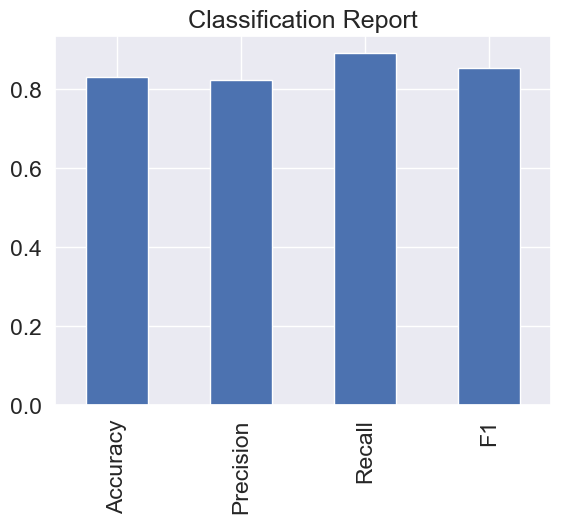

In [74]:
# Lets visualize the cross validation score 
cross_metrics=pd.DataFrame({'Accuracy':cs_acc,
                            'Precision':cs_precision,
                             'Recall':cs_recall,
                             'F1':cs_f1}, 
                           index=[0])
cross_metrics.T.plot.bar(title='Classification Report',
                         legend=False);

### Feature Importance

Feature importance is another as asking, “which features contributed
most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning
model.


In [78]:
clf=LogisticRegression()

clf.fit(X_train,Y_train)

C:\Users\acer\pandas\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
# check coef
clf.coef_

array([[ 3.90443502e-03, -9.90691443e-01,  8.21618541e-01,
        -1.22930566e-02, -6.03080222e-04, -2.11062955e-01,
         4.98629050e-01,  2.43751819e-02, -8.44853829e-01,
        -5.16322941e-01,  4.92616999e-01, -7.53596040e-01,
        -7.43798516e-01]])

In [80]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
features_dict=dict(zip(data.columns,list(clf.coef_[0])))
features_dict

{'age': 0.003904435017714932,
 'sex': -0.9906914425539272,
 'cp': 0.8216185407736869,
 'trestbps': -0.012293056556445619,
 'chol': -0.0006030802221308931,
 'fbs': -0.211062955293652,
 'restecg': 0.4986290498197613,
 'thalach': 0.02437518189015033,
 'exang': -0.8448538285366648,
 'oldpeak': -0.5163229410364928,
 'slope': 0.4926169990569471,
 'ca': -0.7535960402298888,
 'thal': -0.7437985163891498}

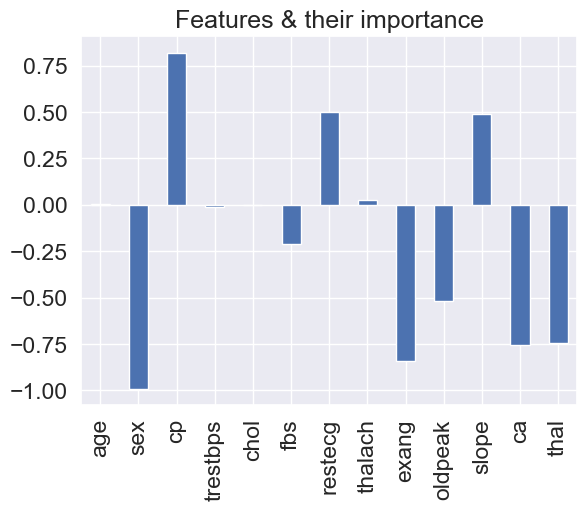

In [93]:
#visualize the data
features=pd.DataFrame(features_dict,index=[0])

features.T.plot.bar(title='Features & their importance',
                    legend=False);